## Import Libraries
First off, we need to import all necessary libraries

In [1]:
# Essentails 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Read in the Data
We will use the read_csv function from the pandas library to load in the datasets.

In [2]:
# Load the training dataset
train = pd.read_csv('train.csv')

# Load the testing dataset
test = pd.read_csv('test.csv')

## General Analysis
Quick overview of the data

In [3]:
print('Shape of training data:', train.shape)
print('Shape of testing data:', test.shape)

Shape of training data: (891, 12)
Shape of testing data: (418, 11)


In [4]:
# Preview the training dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Preview the testing dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Observations**
* **Continuous variables:** Age, Fare <br>
* **Categorical variables:** Survived, Pclass, Sex, SibSp, Parch, Embarked <br>
* **Alphanumeric variables:** Name, Ticket, Cabin

### Check for Missing Values

In [6]:
# Check for missing values in the training dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

3 features in the training dataset contain missing values:
* Age
* Cabin
* Embarked

In [7]:
# Check for missing values in the testing dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

3 features in the testing dataset contain missing values:
* Age
* Cabin
* Fare

## Data Visualization
Visualize a few features to get a better understanding of the dataset

### Survived Feature

Percentage of people that did not survive: 61.62 %
Percentage of people that did survive: 38.38 %


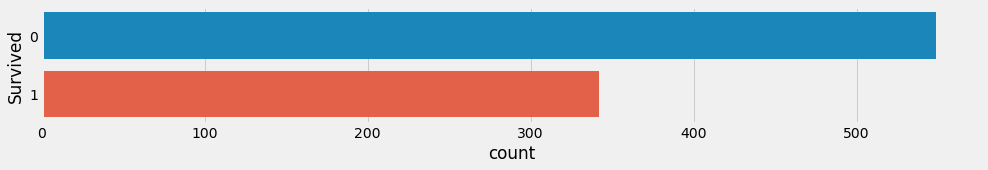

In [8]:
print('Percentage of people that did not survive:', round(train['Survived'].value_counts(normalize=True)[0] * 100, 2), '%')
print('Percentage of people that did survive:', round(train['Survived'].value_counts(normalize=True)[1] * 100, 2), '%')

# Resize the plot
plt.figure(figsize=(15,2))

# Plot a countplot for the Survived column
sns.countplot(y=train['Survived'])
plt.show()

**Observations:** 
* Unfortunately, most passengers aboard the Titanic did not survive the disaster.

### Sex Feature

Percentage of males who survived: 18.89 %
Percentage of females who survived: 74.2 %


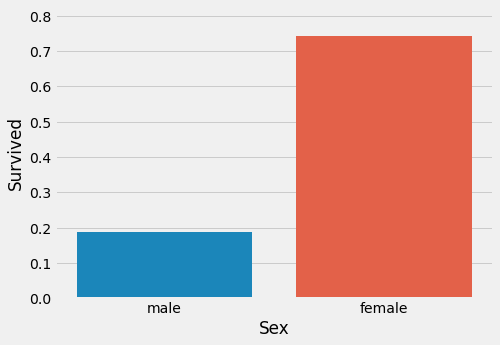

In [9]:
print('Percentage of males who survived:', round(train.groupby('Sex')['Survived'].value_counts(normalize=True)[3] * 100, 2), '%')
print('Percentage of females who survived:', round(train.groupby('Sex')['Survived'].value_counts(normalize=True)[0] * 100, 2), '%')

# Resize the plot
plt.figure(figsize=(7, 5))

# Plot a barplot for Sex vs Survived
sns.barplot(x=train['Sex'], y=train['Survived'], errwidth=0)
plt.show()

**Observation:**
* Females have a much higher chance of survival than males  

### Pclass Feature
A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

Percentage of Pclass = 1 who survived: 62.96 %
Percentage of Pclass = 2 who survived: 47.28 %
Percentage of Pclass = 3 who survived: 24.24 %


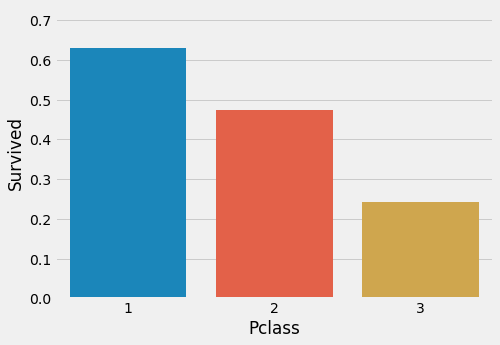

In [10]:
print('Percentage of Pclass = 1 who survived:', round(train.groupby('Pclass')['Survived'].value_counts(normalize=True)[1][1] * 100, 2), '%')
print('Percentage of Pclass = 2 who survived:', round(train.groupby('Pclass')['Survived'].value_counts(normalize=True)[2][1] * 100, 2), '%')
print('Percentage of Pclass = 3 who survived:', round(train.groupby('Pclass')['Survived'].value_counts(normalize=True)[3][1] * 100, 2), '%')

# Resize the plot
plt.figure(figsize=(7, 5))

# Plot a barplot for Pclass vs Survived
sns.barplot(x=train['Pclass'], y=train['Survived'], errwidth=0)
plt.show()

**Observation:**
* Chances of survival were highest among upper class passengers.

### SibSp Feature
Number of siblings / spouses aboard the Titanic

Percentage of SibSp = 0 who survived: 34.54 %
Percentage of SibSp = 1 who survived: 53.59 %
Percentage of SibSp = 2 who survived: 46.43 %
Percentage of SibSp = 3 who survived: 25.0 %
Percentage of SibSp = 4 who survived: 16.67 %


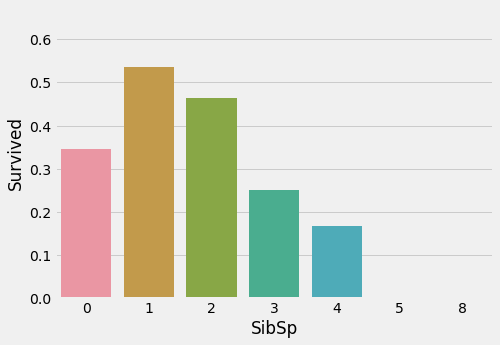

In [11]:
print('Percentage of SibSp = 0 who survived:', round(train.groupby('SibSp')['Survived'].value_counts(normalize=True)[0][1] * 100, 2), '%')
print('Percentage of SibSp = 1 who survived:', round(train.groupby('SibSp')['Survived'].value_counts(normalize=True)[1][1] * 100, 2), '%')
print('Percentage of SibSp = 2 who survived:', round(train.groupby('SibSp')['Survived'].value_counts(normalize=True)[2][1] * 100, 2), '%')
print('Percentage of SibSp = 3 who survived:', round(train.groupby('SibSp')['Survived'].value_counts(normalize=True)[3][1] * 100, 2), '%')
print('Percentage of SibSp = 4 who survived:', round(train.groupby('SibSp')['Survived'].value_counts(normalize=True)[4][1] * 100, 2), '%')

# Resize the plot
plt.figure(figsize=(7, 5))

# Plot a barplot for SibSp vs Survived
sns.barplot(x=train['SibSp'], y=train['Survived'], errwidth=0)
plt.show()

**Observation:**
* People with exactly one sibling/spouse aboard are more likely to survive than others

### Parch Feature
Number of parents / children aboard the Titanic

Percentage of Parch = 0 who survived: 34.37 %
Percentage of Parch = 1 who survived: 55.08 %
Percentage of Parch = 2 who survived: 50.0 %
Percentage of Parch = 3 who survived: 60.0 %
Percentage of Parch = 5 who survived: 20.0 %


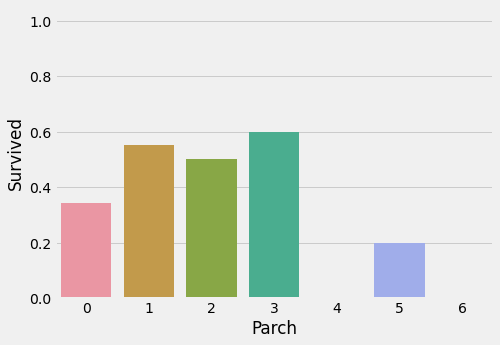

In [12]:
print('Percentage of Parch = 0 who survived:', round(train.groupby('Parch')['Survived'].value_counts(normalize=True)[0][1] * 100, 2), '%')
print('Percentage of Parch = 1 who survived:', round(train.groupby('Parch')['Survived'].value_counts(normalize=True)[1][1] * 100, 2), '%')
print('Percentage of Parch = 2 who survived:', round(train.groupby('Parch')['Survived'].value_counts(normalize=True)[2][1] * 100, 2), '%')
print('Percentage of Parch = 3 who survived:', round(train.groupby('Parch')['Survived'].value_counts(normalize=True)[3][1] * 100, 2), '%')
print('Percentage of Parch = 5 who survived:', round(train.groupby('Parch')['Survived'].value_counts(normalize=True)[5][1] * 100, 2), '%')

# Resize the plot
plt.figure(figsize=(7, 5))

# Plot a barplot for Parch vs Survived
sns.barplot(x=train['Parch'], y=train['Survived'], errwidth=0)
plt.show()

**Observation:**
* People with less than four parents or children abord are more likely to survive than those with four or more.

### Embarked Feature
Port of Embarkation

Percentage of Embarked = S who survived: 33.7 %
Percentage of Embarked = C who survived: 55.36 %
Percentage of Embarked = Q who survived: 38.96 %


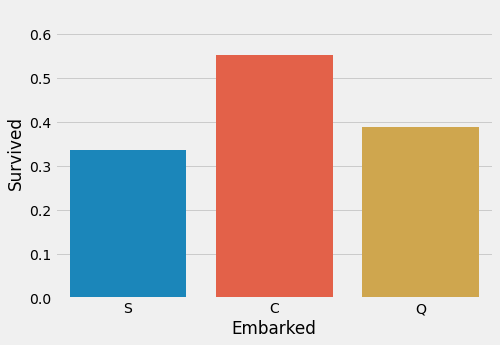

In [13]:
print('Percentage of Embarked = S who survived:', round(train.groupby('Embarked')['Survived'].value_counts(normalize=True)['S'][1] * 100, 2), '%')
print('Percentage of Embarked = C who survived:', round(train.groupby('Embarked')['Survived'].value_counts(normalize=True)['C'][1] * 100, 2), '%')
print('Percentage of Embarked = Q who survived:', round(train.groupby('Embarked')['Survived'].value_counts(normalize=True)['Q'][1] * 100, 2), '%')

# Resize the plot
plt.figure(figsize=(7, 5))

# Plot a barplot for Sev vs Survived
sns.barplot(x=train['Embarked'], y=train['Survived'], errwidth=0)
plt.show()

**Observation:**
* People who embarked from Cherbourg were more likely to survive than others

### Age Feature

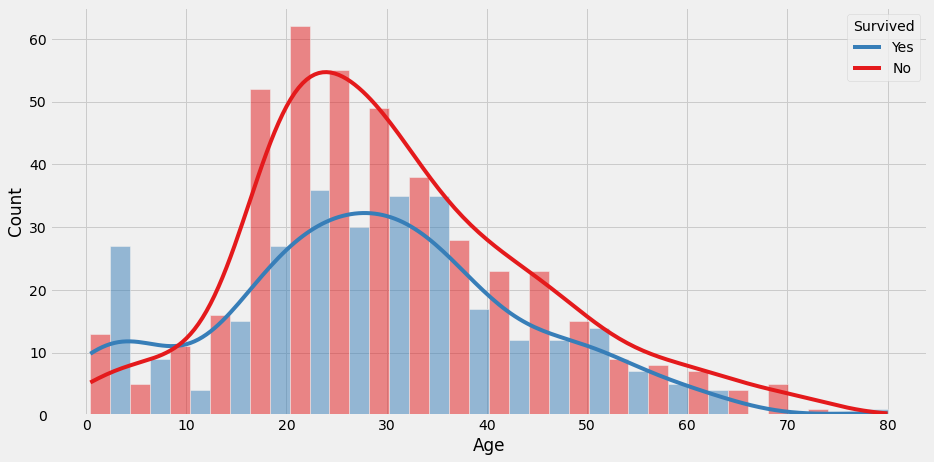

In [14]:
# Resize the plot
plt.figure(figsize=(14,7))

# Plot a histogram for age 
sns.histplot(data=train, x='Age', hue='Survived', multiple='dodge', kde=True, palette='Set1')
plt.legend(labels=['Yes', 'No'], title='Survived')
plt.show()

**Observation:**
* Children (less than 10 years old) are more likely to survive the disaster than others
* Passengers aged 70 and above were least likely to survive

## Next Step - Data Cleaning